<a href="https://colab.research.google.com/github/leticiareisb/PI-Processamento-Digital-ciclo-2/blob/main/C%C3%B3pia_de_Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(value='', description='Caminho:', placeholder='Insira o caminho da imagem')

Checkbox(value=False, description='Binarização')

Checkbox(value=False, description='Redimensionar')

Checkbox(value=False, description='Rotacionar')

Checkbox(value=False, description='Translação')

Checkbox(value=False, description='Borramento')

Checkbox(value=False, description='Nitidez')

Button(description='Aplicar Alterações', style=ButtonStyle())

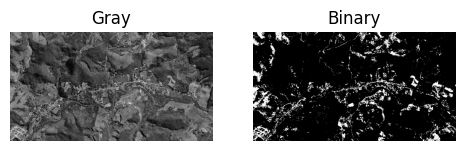

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Função para carregar e manipular a imagem com as opções escolhidas
def process_image(image_path, apply_binary, apply_resize, apply_rotate, apply_translate, apply_blur, apply_sharpen):
    # Carregar a imagem
    image = cv2.imread(image_path)
    if image is None:
        print("Erro: Caminho da imagem inválido.")
        return

    # Converter para escala de cinza
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Obter dimensões da imagem
    (h, w) = gray_image.shape[:2]

    # Lista para armazenar imagens e títulos
    images = [gray_image]
    titles = ['Gray']

    # Aplicar binarização
    if apply_binary:
        _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
        images.append(binary_image)
        titles.append('Binary')

    # Aplicar redimensionamento
    if apply_resize:
        resized_image = cv2.resize(gray_image, (100, 100))
        images.append(resized_image)
        titles.append('Resized')

    # Aplicar rotação
    if apply_rotate:
        center = (w // 2, h // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
        rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))
        images.append(rotated_image)
        titles.append('Rotated')

    # Aplicar translação
    if apply_translate:
        shift_matrix = np.float32([[1, 0, 25], [0, 1, 50]])
        translated_image = cv2.warpAffine(gray_image, shift_matrix, (w, h))
        images.append(translated_image)
        titles.append('Translated')

    # Aplicar borramento (Blur)
    if apply_blur:
        blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
        images.append(blurred_image)
        titles.append('Blurred')

    # Aplicar nitidez (Sharpen)
    if apply_sharpen:
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        sharpened_image = cv2.filter2D(gray_image, -1, kernel)
        images.append(sharpened_image)
        titles.append('Sharpened')

    # Exibir as imagens
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Interface interativa para inserir o caminho da imagem e escolher as operações
image_path_input = widgets.Text(
    value='',
    placeholder='Insira o caminho da imagem',
    description='Caminho:',
    disabled=False
)

binary_checkbox = widgets.Checkbox(
    value=False,
    description='Binarização',
    disabled=False
)
resize_checkbox = widgets.Checkbox(
    value=False,
    description='Redimensionar',
    disabled=False
)
rotate_checkbox = widgets.Checkbox(
    value=False,
    description='Rotacionar',
    disabled=False
)
translate_checkbox = widgets.Checkbox(
    value=False,
    description='Translação',
    disabled=False
)
blur_checkbox = widgets.Checkbox(
    value=False,
    description='Borramento',
    disabled=False
)
sharpen_checkbox = widgets.Checkbox(
    value=False,
    description='Nitidez',
    disabled=False
)

# Função para chamar a manipulação com as opções escolhidas
def on_button_click(b):
    process_image(
        image_path_input.value,
        binary_checkbox.value,
        resize_checkbox.value,
        rotate_checkbox.value,
        translate_checkbox.value,
        blur_checkbox.value,
        sharpen_checkbox.value
    )

# Botão para aplicar as alterações
apply_button = widgets.Button(description="Aplicar Alterações")
apply_button.on_click(on_button_click)

# Exibir a interface
display(image_path_input, binary_checkbox, resize_checkbox, rotate_checkbox, translate_checkbox, blur_checkbox, sharpen_checkbox, apply_button)